## Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
final_df = pd.read_csv('data/final_dataset.csv' )

In [ ]:
final_df.columns

Index(['Name', 'Year', 'Countries', 'Genres', 'Budget(USD)', 'Domestic(USD)',
       'Domestic_Percentage', 'Foreign(USD)', 'Foreign_Percentage',
       'Worldwide(USD)', 'Runtime(mins)', 'Rating', 'Audience_Score',
       'Critics_Score'],
      dtype='object')

In [ ]:
## CLEAN THE PERCENTAGE COLUMNS
def percentage_to_float(x):
    return float(x.rstrip('%')) / 100 if isinstance(x, str) else x

final_df_cleaned = final_df.copy(deep = True)
columns_to_convert = ['Audience_Score', 'Critics_Score']
final_df_cleaned[columns_to_convert] = final_df[columns_to_convert].map(percentage_to_float)

In [ ]:
final_df_cleaned = final_df_cleaned.dropna()
final_df_cleaned

,Name,Year,Countries,Genres,Budget(USD),Domestic(USD),Domestic_Percentage,Foreign(USD),Foreign_Percentage,Worldwide(USD),Runtime(mins),Rating,Audience_Score,Critics_Score
0,10 cloverfield lane,2016,united states,"drama, horror, sci-fi, thriller",5000000,72082999,0.654010,38134000,0.345990,110216999,103,pg-13,0.79,0.91
1,10 things i hate about you,1999,united states of america,"romantic comedy, romance film, coming of age, ...",13000000,38178166,0.713446,15334203,0.286554,53512369,97,pg-13,0.69,0.71
2,"10,000 bc",2008,"united states of america, south africa, new ze...","thriller, adventure, costume drama, action/adv...",105000000,94784201,0.351333,175000000,0.648667,269784201,109,pg-13,0.37,0.10
3,12 monkeys,1995,united states,"mystery, sci-fi, thriller",29000000,57141459,0.338437,111698000,0.661563,168839459,129,r,0.88,0.88
4,12 rounds,2009,united states of america,"action thrillers, thriller, action, crime fiction",20000000,12234694,0.708013,5045632,0.291987,17280326,108,pg-13,0.45,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,zoolander,2001,"united states of america, australia, germany","parody, comedy of errors, comedy",28000000,45172250,0.743197,15608731,0.256803,60780981,90,pg-13,0.80,0.64
3862,zoolander 2,2016,united states,"action, adventure, comedy, mystery, romance",50000000,28848693,0.508592,27874000,0.491408,56722693,101,pg-13,0.20,0.22
3863,zoom,2006,united states of america,"science fiction, action, fantasy, adventure",35000000,11989328,0.958658,517034,0.041342,12506362,93,pg,0.34,0.05
3864,zootopia,2016,united states,"action, adventure, animation, comedy, crime, f...",150000000,341268248,0.333340,682515947,0.666660,1023784195,108,pg,0.92,0.98


### Filter countries..

In [ ]:
# Split countries into lists and explode
df_exploded = final_df_cleaned.copy(deep=True)
df_exploded['Countries'] = final_df_cleaned['Countries'].str.split(',')
df_exploded = df_exploded.explode('Countries')
df_exploded['Countries'] = df_exploded['Countries'].str.strip()

country_counts = df_exploded['Countries'].value_counts()
country_counts.head(30)


Countries
united states of america    3168
united kingdom               501
united states                353
germany                      257
france                       226
canada                       178
australia                    126
japan                         46
spain                         46
italy                         43
china                         32
new zealand                   31
ireland                       29
hong kong                     21
netherlands                   20
sweden                        17
belgium                       17
india                         16
mexico                        15
denmark                       15
czech republic                14
south africa                  11
brazil                        11
hungary                       10
luxembourg                     8
united arab emirates           8
switzerland                    8
norway                         7
finland                        7
england                        7


In [ ]:
USA_df = df_exploded[df_exploded['Countries'].str.contains(r'\b(united states|united states of america|america)\b', case=False, na=False)]
len(USA_df)


C:\Users\giada\AppData\Local\Temp\ipykernel_40076\1644501492.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  USA_df = df_exploded[df_exploded['Countries'].str.contains(r'\b(united states|united states of america|america)\b', case=False, na=False)]


3523

In [ ]:
# Display filtere
USA_df

,Name,Year,Countries,Genres,Budget(USD),Domestic(USD),Domestic_Percentage,Foreign(USD),Foreign_Percentage,Worldwide(USD),Runtime(mins),Rating,Audience_Score,Critics_Score
0,10 cloverfield lane,2016,united states,"drama, horror, sci-fi, thriller",5000000,72082999,0.654010,38134000,0.345990,110216999,103,pg-13,0.79,0.91
1,10 things i hate about you,1999,united states of america,"romantic comedy, romance film, coming of age, ...",13000000,38178166,0.713446,15334203,0.286554,53512369,97,pg-13,0.69,0.71
2,"10,000 bc",2008,united states of america,"thriller, adventure, costume drama, action/adv...",105000000,94784201,0.351333,175000000,0.648667,269784201,109,pg-13,0.37,0.10
3,12 monkeys,1995,united states,"mystery, sci-fi, thriller",29000000,57141459,0.338437,111698000,0.661563,168839459,129,r,0.88,0.88
4,12 rounds,2009,united states of america,"action thrillers, thriller, action, crime fiction",20000000,12234694,0.708013,5045632,0.291987,17280326,108,pg-13,0.45,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,zoolander,2001,united states of america,"parody, comedy of errors, comedy",28000000,45172250,0.743197,15608731,0.256803,60780981,90,pg-13,0.80,0.64
3862,zoolander 2,2016,united states,"action, adventure, comedy, mystery, romance",50000000,28848693,0.508592,27874000,0.491408,56722693,101,pg-13,0.20,0.22
3863,zoom,2006,united states of america,"science fiction, action, fantasy, adventure",35000000,11989328,0.958658,517034,0.041342,12506362,93,pg,0.34,0.05
3864,zootopia,2016,united states,"action, adventure, animation, comedy, crime, f...",150000000,341268248,0.333340,682515947,0.666660,1023784195,108,pg,0.92,0.98


### Distribution of Years
FILTER THE YEARS WITH FEW MOVIES

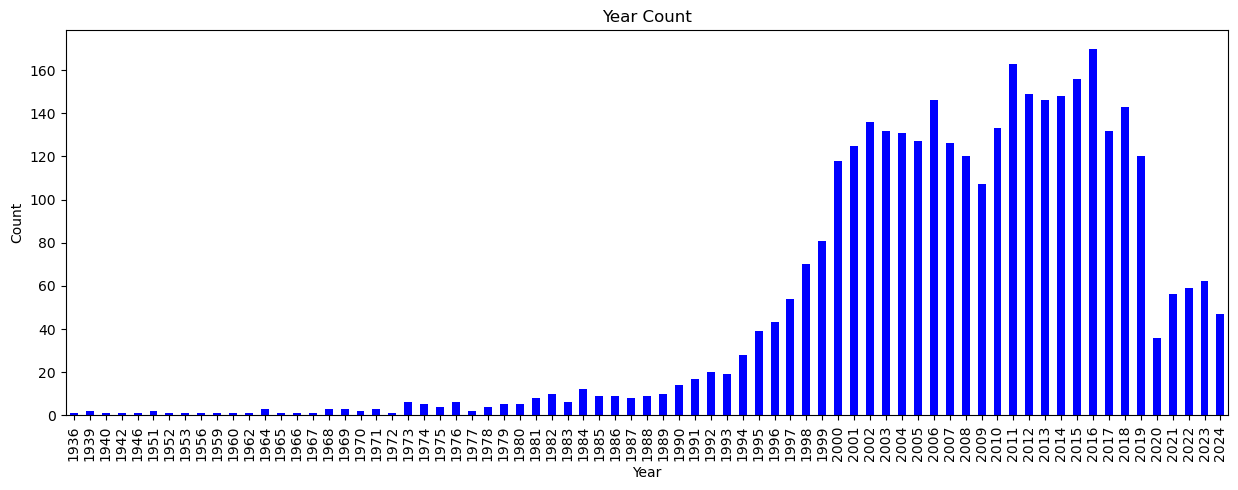

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_years contains the year data
df_copy = USA_df.copy(deep=True)
df_years = df_copy['Year'].dropna()
years_count = df_years.explode().value_counts()
years_count = years_count.sort_index(ascending=True)
years_count.plot(kind='bar', color='blue', figsize=(15, 5))

plt.title('Year Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


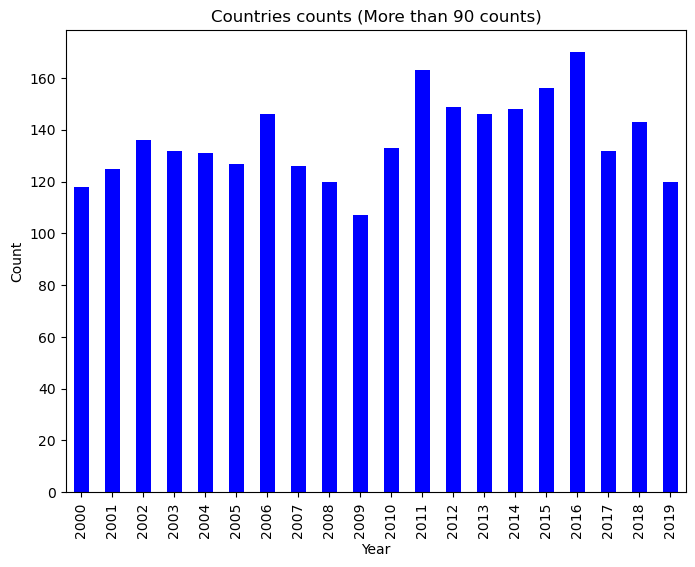

In [ ]:
## with filtering ..
count_threshold = 90
df_years_count = years_count[years_count > count_threshold]
plt.figure(figsize=(8, 6))
df_years_count.plot(kind='bar', color='blue')
plt.title(f'Countries counts (More than {count_threshold} counts)')
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

We can see that the period between 2000-2010 has the most amount of movies released. We should take this into consideration when doing our Time Series analysis.

In [ ]:
USA_df_cleaned = USA_df[USA_df['Year'].isin(df_years_count.index)]

In [ ]:
USA_df_cleaned.Year.value_counts()

Year
2016    170
2011    163
2015    156
2012    149
2014    148
2006    146
2013    146
2018    143
2002    136
2010    133
2003    132
2017    132
2004    131
2005    127
2007    126
2001    125
2008    120
2019    120
2000    118
2009    107
Name: count, dtype: int64

### Consider Inflation..

In [ ]:
data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
             2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 
             2020, 2021, 2022, 2023],
    'Inflation_Rate': [3.40, 1.60, 2.40, 1.90, 3.30, 3.40, 2.50, 4.10, 0.10, 2.70,
                       1.50, 3.00, 1.70, 1.50, 0.80, 0.70, 2.10, 2.10, 1.90, 2.30,
                       1.40, 7.00, 6.50, 3.40],

}
inflation_df = pd.DataFrame(data)
inflation_df['Cumulative_Inflation'] = (1 + inflation_df['Inflation_Rate'] / 100).cumprod() - 1
inflation_df['Cumulative_Inflation'] = inflation_df['Cumulative_Inflation'] - inflation_df['Cumulative_Inflation'].iloc[0]
inflation_df.head(5)


,Year,Inflation_Rate,Cumulative_Inflation
0,2000,3.4,0.000000
1,2001,1.6,0.016544
2,2002,2.4,0.041757
3,2003,1.9,0.062196
4,2004,3.3,0.098371


In [ ]:
## consider my dataset with inflation:.. 
final_inflated = USA_df_cleaned.copy(deep = True)
final_inflated['Cumulative_Inflation'] = USA_df_cleaned['Year'].apply(lambda x: inflation_df['Cumulative_Inflation'].iloc[2023- x])
## apply inflation: 
final_inflated['Worldwide(USD)'] = final_inflated['Worldwide(USD)'] * (1 + final_inflated['Cumulative_Inflation'])
final_inflated['Domestic(USD)'] = final_inflated['Domestic(USD)'] * (1 + final_inflated['Cumulative_Inflation'])
final_inflated['Foreign(USD)'] = final_inflated['Foreign(USD)'] * (1 + final_inflated['Cumulative_Inflation'])
final_inflated['Budget(USD)'] = final_inflated['Budget(USD)'] * (1 + final_inflated['Cumulative_Inflation'])
final_inflated['Domestic_Percentage'] = final_inflated['Domestic(USD)'] / final_inflated['Worldwide(USD)']
final_inflated['Foreign_Percentage'] = final_inflated['Foreign(USD)'] / final_inflated['Worldwide(USD)']

final_inflated.rename(columns = {'Worldwide(USD)': 'Worldwide(USD)_Inflated', 'Domestic(USD)': 'Domestic(USD)_Inflated', 'Foreign(USD)': 'Foreign(USD)_Inflated', 'Budget(USD)': 'Budget(USD)_Inflated'}, inplace = True)

In [ ]:
final_inflated

,Name,Year,Countries,Genres,Budget(USD)_Inflated,Domestic(USD)_Inflated,Domestic_Percentage,Foreign(USD)_Inflated,Foreign_Percentage,Worldwide(USD)_Inflated,Runtime(mins),Rating,Audience_Score,Critics_Score,Cumulative_Inflation
0,10 cloverfield lane,2016,united states,"drama, horror, sci-fi, thriller",6.076746e+06,8.760602e+07,0.654010,4.634613e+07,0.345990,1.339521e+08,103,pg-13,0.79,0.91,0.215349
2,"10,000 bc",2008,united states of america,"thriller, adventure, costume drama, action/adv...",1.441563e+08,1.301309e+08,0.351333,2.402606e+08,0.648667,3.703914e+08,109,pg-13,0.37,0.10,0.372917
4,12 rounds,2009,united states of america,"action thrillers, thriller, action, crime fiction",2.726275e+07,1.667757e+07,0.708013,6.877890e+06,0.291987,2.355546e+07,108,pg-13,0.45,0.31,0.363138
5,12 strong,2018,united states,"action, drama, history, war",3.979050e+07,5.209113e+07,0.644274,2.876133e+07,0.355726,8.085246e+07,130,r,0.62,0.50,0.136872
6,12 years a slave,2013,united states of america,"biography, drama, history",2.539260e+07,7.195247e+07,0.301875,1.663993e+08,0.698125,2.383517e+08,134,r,0.90,0.95,0.269630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,zoolander,2001,united states of america,"parody, comedy of errors, comedy",4.851315e+07,7.826600e+07,0.743197,2.704388e+07,0.256803,1.053099e+08,90,pg-13,0.80,0.64,0.732612
3862,zoolander 2,2016,united states,"action, adventure, comedy, mystery, romance",6.076746e+07,3.506124e+07,0.508592,3.387664e+07,0.491408,6.893788e+07,101,pg-13,0.20,0.22,0.215349
3863,zoom,2006,united states of america,"science fiction, action, fantasy, adventure",5.014200e+07,1.717625e+07,0.958658,7.407176e+05,0.041342,1.791697e+07,93,pg,0.34,0.05,0.432628
3864,zootopia,2016,united states,"action, adventure, animation, comedy, crime, f...",1.823024e+08,4.147601e+08,0.333340,8.294952e+08,0.666660,1.244255e+09,108,pg,0.92,0.98,0.215349


In [ ]:
final_inflated['Countries'].value_counts()

Countries
united states of america        2386
united states                    340
united kingdom united states       1
united states germany              1
Name: count, dtype: int64

In [ ]:
final_inflated.drop(columns = ['Cumulative_Inflation'], inplace = True)

In [ ]:
final_inflated.to_csv('data/final_dataset_inflated.csv', index=False)